In [97]:
import workbook7_mcq as workbook8_mcq

# Perceptrons - The basis of Artificial Neural Networks

Perceptrons, invented by Frank Rosenblatt in the late 1950's,
are a form of supervised machine learning algorithm inspired by neuron cells.
In neurons, signals come in along the dendrites and out along the axon. 
A synapse is the connection between the axon of one cell and the dendrites of another.
Crudely, input signals are 'summed' and if they reach a certain threshold the neuron 'fires'
and sends a signal down the synapse to the connected cells.

![Perceptron](figures/Perceptron.png "Perceptron Image")

Perceptrons are an algorithmic approximation of this process and can learn to solve simple classification problems.
Input values are multiplied by a learnable parameter called a *weight*.
If the sum of the inputs $\times$ weights is over a certain threshold the Perceptron 'fires' and generates an output.
We use the *error* in the output to change the value of the *weights* by a small amount - the *learning rate*.
The process is repeated until the error is 0, or as small as we can get it.

**Note:** The threshold which determines if the Perceptron produces an output is determined by its *activation function*.
For Perceptrons this is often a step function which outputs a 1 or 0 i.e. 'fires' or not. However, it can also be a
non-linear function such as sigmoid, which will always produce a real numbered output in the range 0 to 1.

### Perceptron - Algorithm

1. Set weights to random values in range [-0.5, 0.5]

2. Set learning rate to a small value, usually less than 0.5

3. For each training example in the dataset i.e one 'epoch'

    A. Calculate output (activation)
    
    $sum = \sum\limits_{i=0}^{n} w_i \times x_i$
      
    $if\ sum >\ 0 \\ \;\;\;activation = 1 \\ \\else \\ \;\;\;activation = 0$
       
    B. Calculate error
    
    $error = target \, output - activation$

    C. Update each of the weights values
    
    $change \, in \, weight = error \times input \times learning \, rate$


4. Repeat from step 3 until error is 0 (or as close as possible), or for the number of training epochs.

### Perceptrons - Logical Operators

We are going to use binary data to show that Perceptrons can learn to represent logical functions,
though you could also think about it as a prediction/classification problem
i.e. for a given set of inputs what is the correct output.
A truth table can be used as the Perceptrons *training* data, with each row representing an input example.
Each training example has two inputs (*features*) and one output (*label*).

| Input 1| Input 2| AND | OR  | XOR |
|:------:|:------:|:---:|:---:|:---:|
| 0      | 0      | 0   | 0   | 0   | 
| 0      | 1      | 0   | 1   | 1   |
| 1      | 0      | 0   | 1   | 1   |
| 1      | 1      | 1   | 1   | 0   |

First we will import some python modules and then create the training data.

**Note:** Input data is often denoted as X and labels/target outputs with Y.
Here we are going to use **inputs**, but the target outputs have been labeled **AND**, **OR** and **XOR**.
This is so we can be clear about what the outputs should be.

<div class="alert alert-warning" style="color:black"><h2> Activity 1: How the perceptron learns simple binary functions</h2>
Work through the first few cells ‘Logical Operators’, ‘Implementation’ and ‘Linear Decision Boundary’ sections and try to familiarise yourself with the algorithm and how the process builds a model by learning values for the weights.
<ul>
    <li>How well does it perform on different logical functions?</li>
 <li>You do not need to remember the equation for the calculating the decision boundary.</li>
    <li> But you should try and understand how this decision boundary relates to the Perceptrons output (and why it can only be straight).</li>
    </ul>
    </div>
    



In [98]:
import numpy as np
from random import random
# Create input and target output data
inputs = [[0, 0],
          [1, 0],
          [0, 1],
          [1, 1]] 
print(f"Input data: {inputs} " )

target_outputs_AND = [0, 0, 0, 1]
print(f"target_outputs_AND: {target_outputs_AND}" )

target_outputs_OR = [0, 1, 1, 1]
print(f"target_outputs_OR: {target_outputs_OR} ")

target_outputs_XOR = [0, 1, 1, 0]
print(f"target_outputs_XOR: {target_outputs_XOR}" )

Input data: [[0, 0], [1, 0], [0, 1], [1, 1]] 
target_outputs_AND: [0, 0, 0, 1]
target_outputs_OR: [0, 1, 1, 1] 
target_outputs_XOR: [0, 1, 1, 0]


### Implementation

Now lets write a function to build and train a Perceptron.
This is just an implementation of the algorithm above, except we are going to train one **step** or one **epoch** at a time.
This allows us to see what the algorithm is doing more clearly.

- A training **step** applies the algorithm to just one input example (A, B and C above).
- An **epoch** repeats the training step for all input examples in the data (so in this case 4).

First we define the learning rate and model - run the next cell to define the class we used in the lectures

In [99]:
class two_input_perceptron:
    def  __init__(self,weight1, weight2,biasweight, learningRate):
        self.weight1 = weight1
        self.weight2 = weight2
        self.biasweight = biasweight
        self.learningRate = learningRate 
        
    def predict(self,input1:int,input2:int) -> int:
        ## step 1 multiply each input by its weight and sum them
        summedInput = input1*self.weight1 +input2*self.weight2 + self.biasweight
        ## step 2 compare sum to thrreshold (0) to decide output
        if summedInput>0:
            return 1
        else:
            return 0

    def update_weights( self, in1,in2,target):
        # calculate error: difference between target output and actual output
        # error could be -1, 0 or 1
        error = int (target - self.predict(in1,in2))
        # for each input and bias, apply the update rule 
        # update = error *  input  * learningRate
        if(error != 0):
            self.biasweight += error * 1 *self.learningRate # bias is always +1
            self.weight1 += error * in1 * self.learningRate
            self.weight2 += error * in2 * self.learningRate           
            return 1
        else:
            return 0     ## <=let the calling function know if it made the right prediction


Now run the cell below to:
- create a perceptron instance, 
- set it's  **learning_rate** variable determines how large a change we will make to the weights each time they are updated.

- run the model for the and data

As it trains, in each epoch you will be told when it makes a prediction error, and what the updated weights are you should see output for the current inputs and target outputs,
training step, epoch and total error for that epoch.

<div class="alert alert-warning" style="color:black" ><h3> Activity 1.1: Run the cell below once and make sure you understand which weights are being updated at each step, and why.</h3></div>


In [100]:
#### from random import random

target = target_outputs_AND
# start with random weights
w0=random()
w1 = random()
w2 = random()
print(f"\t\t\t\t\tInitial random weights:   w1 {w1:.4f}, w2 {w2:.4f} biasweight {w0:.4f}")

myPerceptron = two_input_perceptron(w1,w2,w0,0.1)


# just keep presenting the test cases nd updating until there are no errors
for epoch in range(50):
    errors = 0
    for testcase in range(4):
        # get the inputs to present
        input1 = inputs[testcase][0]
        input2 = inputs[testcase][1]
        # make the prediction
        prediction = myPerceptron.predict(input1,input2)
        # print changes
        messageString = f"Input {input1} {input2}:"
        messageString  += f"target {target[testcase]}, predicted {prediction} so error = {(target[testcase]-prediction):2d}.   "

        thiserror = myPerceptron.update_weights(input1,input2,target[testcase])
        errors += thiserror
        
        messageString += f"After updates:   w1 {myPerceptron.weight1:.4f}, w2 {myPerceptron.weight2:.4f} biasweight {myPerceptron.biasweight:.4f}"
        print(messageString)


    if(errors >0):
        print(f"Overall in epoch {epoch} there were {errors} errors\n")
    else:
        print(f" Perceptron solved the learning problem in {epoch} epochs")
        break

					Initial random weights:   w1 0.2307, w2 0.3356 biasweight 0.1171
Input 0 0:target 0, predicted 1 so error = -1.   After updates:   w1 0.2307, w2 0.3356 biasweight 0.0171
Input 1 0:target 0, predicted 1 so error = -1.   After updates:   w1 0.1307, w2 0.3356 biasweight -0.0829
Input 0 1:target 0, predicted 1 so error = -1.   After updates:   w1 0.1307, w2 0.2356 biasweight -0.1829
Input 1 1:target 1, predicted 1 so error =  0.   After updates:   w1 0.1307, w2 0.2356 biasweight -0.1829
Overall in epoch 0 there were 3 errors

Input 0 0:target 0, predicted 0 so error =  0.   After updates:   w1 0.1307, w2 0.2356 biasweight -0.1829
Input 1 0:target 0, predicted 0 so error =  0.   After updates:   w1 0.1307, w2 0.2356 biasweight -0.1829
Input 0 1:target 0, predicted 1 so error = -1.   After updates:   w1 0.1307, w2 0.1356 biasweight -0.2829
Input 1 1:target 1, predicted 0 so error =  1.   After updates:   w1 0.2307, w2 0.2356 biasweight -0.1829
Overall in epoch 1 there were 2 errors

Inp

<div class = "alert alert-warning" style="color:black"><h3> Activity 1.2: Checking your understanding</h3>
<ol>
 <li>Now make a prediction about whether you will see exactly the same thing when you run the cell again.<br>
     Be honest: Write down your answer, and your reasoning *before* you run the cell :)</li>
 <li>Run the cell above once more.  Was your answer right?  If not, why not?</li>
 <li> Change line 3 of the code so that the target is now target_outputs_OR . <br> 
      Again make a prediction about what you expect to see before you run the code.</li>
 <li> Change line 3 of the code so that the target is nowtarget_outputs_XOR. <br>  
     Again make a prediction about what you expect to see before you run the code.</li>
    <li>Finally run the next cell and answer the questions in it.</li>
    </ol>
    </div>

In [101]:
import workbook7_mcq as workbook8_mcq
display(workbook8_mcq.Q1)

display(workbook8_mcq.Q2)

display(workbook8_mcq.Q3)

display(workbook8_mcq.Q4)

display(workbook8_mcq.Q5)

## Perceptrons learn Straight Decision Boundaries!
<img src="figures/straightLine.png" width="300" style="float:right">

To give you an intuition for what the Perceptron is doing, consider the equation for a straight line:

$y = mx + c$

a and c are coefficients just like the learned weights and bias in the Perceptron.

Now lets think about when the perceptron's behaviour (output) changes as the inputs vary.
- We know that the output depends on whether the sum of the weighted inputs is greater than zero (output 1) or not (output 0).
- But if we are using the perceptron to make predictions,   
  then saying that *the behaviour changes when ...*    
  is the same as saying: *the decision boundary is when ...*
  
- In other words **the decision boundary for a perceptron** is when $y =0$ where      
$y = input1 \times weight1 \;\; + input2 \times weight2\;\; + \;\;bias\_weight$  


Setting $y = 0$ and re-arranging the equation in terms of the two inputs gives:

$input2 = - \frac{weight1}{weight2} \times input1 - bias \times \frac{weight}{weight2}$

Which is the same form as the equation for a straight line where:
- the ratio of the bias to weight2 defines the intercept  
  i.e., the critical value of input2 when input1 = 0
- the ratio of weights 1 and 2 defines the slope/gradient of the line (a)  
  i.e., how much the critical value of input2 changes each time input1 changes by +1 

So for any given value of input1, we can use this equation to tell us the critical value of input2
- above that the output is 1,  below that, the output is 0


<div class="alert alert-warning" style="color:black"><h3> Activity 1.3 interactively changing weights to mimic automatic learning</h3>
    Run the code cell below to create an interactive widget that allows you to manually adjust the weights, and see how the decision boundary moves.<br>
    You don't need to understand the python in the first cell- it sets up the sliders, the radio buttons and the plot widget.
    <ul>
        <li> When you click to show different functions, the colour (target) of the dots at (0,0),(0,1),(1,0) and (1,1) change.</li>
        <li> The sliders let you manually control the values of the perceptron weights </li>
        <li> The red line shows the decision boundary calculated from the weight values </li>
        <li> When the weights are correct (i.e. the perceptron will correctly predict) that function:<br>
             red dots should be 0 (below the line), <br>
            green dots should 1 (above the line </li>
    </ul>
    <b>Tasks</b>    <ol>
        <li> Try different functions, and see if you can manually tweak the slider values so that the red line separates the red and green dots </li>
    <li> You might find it helpful to  go around the four points (00,10,01,11) in turn,<br>
        looking at whether they are on the wrong side of the line, <br>
        and if so moving the appropriate sliders a little  by hand, to mimic what the update mechanism does automatically</li>
    <li> Then answer the questions in the second cell.   </li>
    </ol>
    </div>


In [102]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt

%matplotlib inline


weight1 = widgets.FloatSlider(value=-0.5,min = -1,max = 1)
weight2 = widgets.FloatSlider(value=0.5,min = -1,max = 1)
biasweight = widgets.FloatSlider(value=-0.5,min = -1,max = 1)
funcToModel = widgets.RadioButtons(options=['OR','AND','XOR'])
output=interact(workbook8_mcq.showPerceptron, w1=weight1,w2=weight2,bias=biasweight,func = funcToModel)

interactive(children=(FloatSlider(value=-0.5, description='w1', max=1.0, min=-1.0), FloatSlider(value=0.5, des…

In [103]:
display(workbook8_mcq.Q6)

display(workbook8_mcq.Q7)

<div class ="alert alert-warning" style="color:black">
    <h2> Activity 2: Learning from  examples with  continuous features </h2>
    
The aim of this task is to illustrate how Perceptrons can be applied to a larger, more realistic, dataset with real numbered features.  

We'll use the term **epoch** to mean one presentation of each of the training set cases.
</div>


### Perceptrons - Training and Testing on Real-Fake Data

Truth table data and logical functions are a good way to learn the Perceptron algorithm but the data isn't very realistic.

Most problems are much more complex and cannot be represented with binary data or solved with only 4 training examples.
We were also only training for one **step** (one input example) or one **epoch** (all input examples) at a time, so that we
could see what the algorithm was doing.

In supervised learning, generally we want to train for a fixed number of epochs, or until there is no improvement in
the error on the training data. Once training is finished we apply the model (trained weights) to some test data and
measure its performance. This gives us an indication of how well it would perform on new data it has not 'seen' before.

Next we will train and then test a Perceptron on a larger, real numbered dataset so that we can see the process of 
applying machine learning in practice.

As before, we will first import some python modules and then randomly generate some training and test data.
This time the features of the data will be real numbers but there are still only 2 classes/labels, 0 and 1.


- In the first cell,  The make_blobs function generates a random dataset.
  The 'centers' variable determines how many classes/label are in the data,  
  'n_features' is the number of features each example has, and  
  cluster_std is the 'spread' of each class i.e. how randomly scattered they are from each other.
- The other call in the first cell splits the data created  into train and testsets. 
  - this is described more fully later on in this workbook.

- you **don't** have to understand how the visualisation code works

It's also helpful to plot the data so that we can see how it is distributed so we'll just use 3D data as we can visualise that

<div class="alert alert-warning" style="color:black">
    <h3> Activity 2:1 Create, split, and visualise the data.</h3>
    Run the next two cells to:
    <ul> 
        <li>generate the data,</li>
        <li>split it  into training and test sets,</li>
        <li>then visualise the data in 3D</li>
        </div>

In [104]:
# Import some needed modules
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


# Generate random dataset
num_samples = 150
features, labels = make_blobs(n_samples=num_samples, centers=2, n_features=3, cluster_std=2.0, random_state=0)

# Split data to training and test data, 2/3 for training and 1/3 for testing
train_X, test_X, train_y, test_y = train_test_split(features, labels, test_size=0.33)

Shape of training data: (100, 3) 
Shape of test data: (50, 3)
First 5 rows of training data:
[[ 1.79746708  4.59187447  4.96381454]
 [ 1.07450783 -2.14867636  3.11268259]
 [ 0.94222925  5.0620908   6.57388542]
 [ 5.51577933  1.39505598  2.14678456]
 [ 0.35316501  4.41611801 -0.27503216]]
First 5 labels of training data:
[0 1 0 0 0]


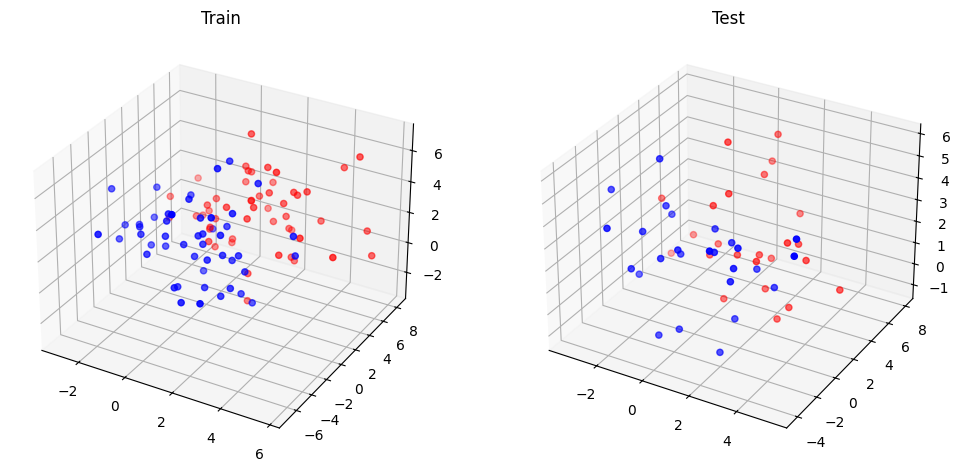

In [105]:
# Print some information about the data
print(f"Shape of training data: {train_X.shape} ")
print(f"Shape of test data: {test_X.shape}" )
print("First 5 rows of training data:")
print(train_X[: 5, :])
print("First 5 labels of training data:")
print(train_y[:5])

#use the blob labels to set a value for the colours of the markers in our plots
# boring bit of numpy manipluation here :)
trlabels = train_y.astype(str)
trlabels = np.where(trlabels=='0','red',trlabels)
trainlabels = np.where(trlabels=='1','blue',trlabels)
telabels = test_y.astype(str)
telabels = np.where(telabels=='0','red',telabels)
testlabels = np.where(telabels=='1','blue',telabels)



# Plot the training and test data side by side 
fig=plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121, projection='3d') 
ax2 = fig.add_subplot(122,projection='3d')
    
ax1.scatter(train_X[:,:1], train_X[:,1:2],train_X[:,2:3],c=trainlabels)
ax1.title.set_text("Train")
ax2.scatter(test_X[:,:1], test_X[:,1:2],test_X[:,2:3],c=testlabels)
ax2.title.set_text("Test")

 

###  A more generic perceptron 
The class below extends the two-input perceptron class from above, so that it:
1. Is more generic - and  can cope with any number of inputs.   
   To achieve that we move the weight initialisation from the constructor to the fit() function.  
   This lets it  deal with data with any number of features by querying the data's *shape* attribute  
2. Has a **fit()** method that run the training for a number of epochs,  instead of having a loop outside the class.  
  - This also means it will match the sklearn models way of doing things.
  - Training will stop:
    - when  the whole training set is presented (one epoch) with no prediction errors, or  
    - after a fixed number of epochs have been run - because we can't assume 100% accuracy is achievable!
3. Implements a **predict()** method that  takes a set of items to predict as a parameter.  
   This method can be used  to estimate the performance of our model on a held back test set.  
   It just loops over the cases calling a methgod PredictOneCase()
4. Implements a method **predictOneCase()** that presents the  set of feature values corresponding to one new item/case to the network and returns the network's output value

<div class = "alert alert-warning" style="color:black">
    <h2> Activity 2.2 Explore the effect of training parameters on learning</h2>  
    <b>Read through, then run, the two cells below.</b>   If you don't understand it,  ask your tutor or one of the others in your class!<br><br>
    <b>Experiment</b> with changing the 
    <ul>
        <li>maxEpochs - how many iterations of model adaptation happen, and</li>
        <li>learningRate - how big is step-size of each adaptation</li>
    </ul>to explore what  effect these have on how well the perceptrons learns the training data.<br> Remember to run the second cell a few times since the perceptron starts with a random model (set of weights).
</div>

In [106]:

class n_input_perceptron:
    def  __init__(self, learningRate,debug=True):
        # The only wieght we  set in the constructor is a random initial  bias weight
        self.biasweight = random()
        self.learningRate = learningRate 
        self.debug = debug
        
    def fit(self, data:np.ndarray, targets=[], maxEpochs=10):
        ## start by setting up the perceptron
        
        #ask the data how many columns it has
        self.numInputs= data.shape[1]
        
        # then create that many weights and randomise them
        self.weights = np.zeros(self.numInputs)
        for i in range(self.numInputs):
            self.weights[i] = random()
        
        # set the maximum training time
        self.maxEpochs = maxEpochs

        # now the training loop - this is exactly the same code as in the earlier cell
        # just tweaked to match the size of the data our perceptron is asked to model
        # 1 epoch <=> present each trainig case once
   
        numTrainingCases = data.shape[0]
        # run for at most a fixed number of epochs
        for epoch in range(self.maxEpochs):
            errors=0
            correct=0
            # within each epoch present each trainig item
            for traincase in range(numTrainingCases):
                # get the inputs to present- now it is a 1d array
                inputValues = data[traincase]
        
                # make the prediction
                prediction = self.predictOneCase(inputValues)
            
                #  update weights  if there were errors
                if (prediction != targets[traincase]):
                    self.update_weights(inputValues,targets[traincase], prediction)
                    errors = errors+ 1
                else:
                    correct = correct +1
                    
            # Now all the training cases have been presented in this epoch
            # if there were no errors, say so and  quit training, 
            # otherwise print a message        
            if(errors ==0):
                if(self.debug):
                    print(f" Perceptron solved the learning problem after {epoch+1} epochs")
                break
            else:
                if(self.debug):
                    print(f"in epoch {epoch} there were {errors} errors and {correct} correct")
                pass
        

    # the predict() method will now accept a set of cases to make predictions for
    # it just runs a loop repeatedly calling a function to predict for one case
    def predict(self,data):
        #ask the data how many rows it has
        numToPredict = data.shape[0]
        predictions = []
        for newCase in range(numToPredict):
            predictions.append (self.predictOneCase(data[newCase]) )
        return predictions
    
    
    # this is the old predict method, changed to take an array of inputs instead of just two
    def predictOneCase(self,inputValues) -> int:
        summedInput =  self.biasweight  * 1.0 # since bias always has the value 1.0
        for i in range(self.numInputs):
            summedInput += inputValues[i] * self.weights[i]
        if summedInput>0:
            return 1
        else:
            return 0

    # slightly changed the update method to take both the target and the prediction    
    def update_weights( self, inputValues,target, prediction):
        error = int (target - prediction)
        
        # no updates if there were no errors!
        if(error != 0):
             # bias is always +1 so biasweight is always changed
            self.biasweight += error * 1 *self.learningRate
            
            # loop through the weights updating them if necessary
            for i in range (self.numInputs):
                # only updating the weights if the corresponding input was 1
                if (inputValues[i]>0):
                    self.weights[i] += error * inputValues[i] * self.learningRate          




In [204]:
thePerceptron = n_input_perceptron(learningRate=0.01)
thePerceptron.fit(train_X,targets=train_y, maxEpochs=50)

in epoch 0 there were 26 errors and 74 correct
in epoch 1 there were 9 errors and 91 correct
in epoch 2 there were 7 errors and 93 correct
in epoch 3 there were 6 errors and 94 correct
in epoch 4 there were 6 errors and 94 correct
in epoch 5 there were 1 errors and 99 correct
in epoch 6 there were 2 errors and 98 correct
in epoch 7 there were 4 errors and 96 correct
in epoch 8 there were 1 errors and 99 correct
in epoch 9 there were 2 errors and 98 correct
in epoch 10 there were 2 errors and 98 correct
in epoch 11 there were 2 errors and 98 correct
in epoch 12 there were 2 errors and 98 correct
in epoch 13 there were 2 errors and 98 correct
in epoch 14 there were 1 errors and 99 correct
in epoch 15 there were 1 errors and 99 correct
in epoch 16 there were 2 errors and 98 correct
in epoch 17 there were 3 errors and 97 correct
in epoch 18 there were 1 errors and 99 correct
in epoch 19 there were 2 errors and 98 correct
in epoch 20 there were 2 errors and 98 correct
in epoch 21 there were

<div class = "alert alert-warning" style="color:black">
    <h2>Activity 2.3: Testing the trained perceptron on unseen data</h2>

Run the two cells below to: 
 <ul>
 <li> Test the trained model by making predictions on the test data.<br> 
       Note that now we just call <b>predict()</b> but we dont update the weights.</li>
  <li> Calculate the decision boundary by putting the weights from the trained perceptron into the formula from activityt 1.3</li>
    <li> Plot the training and test data again, and show where the decision boundary is.</li>
    </ul>
    </div>


In [108]:
# ask the trained perceptron to predict labels some unseen data

#remind ourselves how much test data we have
print( f"the test data and label arrays have sizes {test_X.shape} and {len(test_y)}")
numTestCases = test_X.shape[0]

#ask the trained perceptron to make predictions
predictions = thePerceptron.predict(test_X)

# compare those to the trie values to see how well the perceptron did
correct = 0
for case in range (numTestCases):
    if (predictions[case] == test_y[case]) :
        correct += 1
print (f"On the unseen test data the perceptron made {correct} correct predictions and {numTestCases - correct} errors so the accuracy is {100*correct/numTestCases}%")

the test data and label arrays have sizes (50, 3) and 50
On the unseen test data the perceptron made 48 correct predictions and 2 errors so the accuracy is 96.0%


### Run the next cell to get a visualisation of the learned decision boundary
You dont have to go into the matplotlib details of  how the plots are created.   
The decision boundary is created by querying the perceptron's learned weights and putting them into ther formula from activity 1.3

In [110]:
    def show_perceptron_decision_boundary(train_X,train_y,test_X,test_y,thePerceptron):
        """method to visualise a decision boundary and train/test sets"""
    
        # Create the range of values for decision boundary
        x_range = np.linspace(train_X[:,0].min(), train_X[:,0].max(), 10)
    
        # query the weights learned by the model
        biasweight = thePerceptron.biasweight
        weight1 = thePerceptron.weights[0]
        weight2 = thePerceptron.weights[1]
    
        # apply the formula from activy 1.3 to get the y-value for the decision boundary
        # at each x-point we just made
        y_range = [((-weight1/weight2) * x) + (-biasweight/weight2) for x in x_range]
    
        # Plot the training  and test data with the decision boundary
        figure, ax = plt.subplots(1,2,figsize=(16, 8))
        ax[0].scatter(x=train_X[:,0], y=train_X[:,1], c=trainlabels)
        ax[0].plot(x_range, y_range, color='r')
        ax[0].set_title("Training data")
        ax[1].scatter(x=test_X[:,0], y=test_X[:,1], c=testlabels)
        ax[1].plot(x_range, y_range, color='r')
        ax[1].set_title("test data")
    #plt.show()

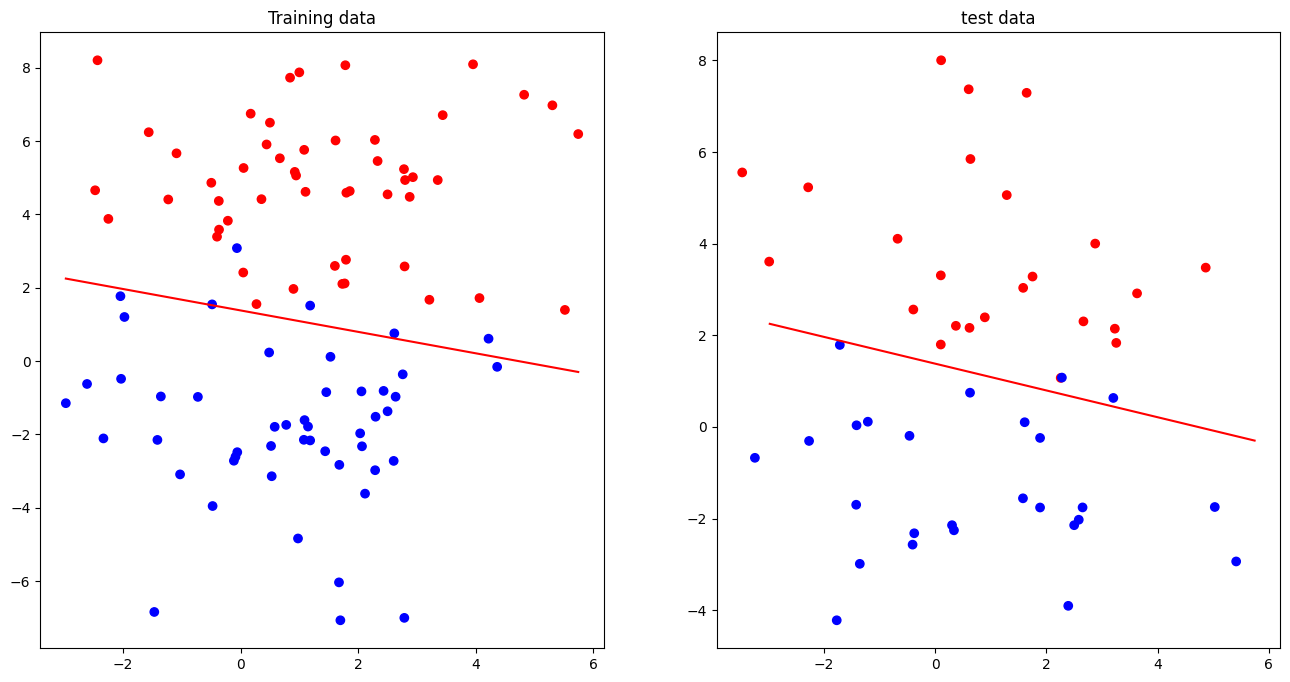

In [111]:
show_perceptron_decision_boundary(train_X,train_y,test_X,test_y,thePerceptron)

<div class="alert alert-warning" style="color:black"><h2> Activity 3: Learning from data with more  features and classes </h2></div

We will use the Iris data to illustrate how to do this.   
This data set has 4 features and 3 classes.  
<img src="figures/cascading.png" style="float:right">    
Since perceptrons can only make two-way distinctions so we have a choice of options:

1. (simplest) we create three classifiers - one to recognise each class. 
  - This requiresa way of specfying how to combine  their votes,
  - and what to do if all three say "not in class".


    
2. (slightly more complex) use a cascade approach (shown in image)
- first train a network to predict if a training item items is setosa or not. 
- then use the training items that are predicted 'not-setosa'   
  to train a second perceptron that predicts   versicolor-or virginica
    

    
In the next few cells we show how to create a cascading classifier
    
As usual we begin by loading the data set and checking we have split it correctly


In [ ]:
# load the data

#useful functions
from  sklearn.model_selection import train_test_split 
from sklearn.metrics import ConfusionMatrixDisplay as plot_confusion_matrix

#the iris data
from sklearn.datasets import load_iris

irisX,irisy = load_iris(return_X_y = True)
feature_names = ['sepal width','sepal_length','petal_width','petal_length']
irisLabels = np.array(('setosa','versicolor','virginica'))
# show what the data and labels looks like
print(f" item 0   feature values are {irisX[0]} and label is {irisy[0]}")
print(f" item 50  feature values are {irisX[50]} and label is {irisy[50]}")
print(f" item 100 feature values are {irisX[100]} and label is {irisy[100]}")


numcases = len(irisy)
print(f'there are {numcases}  training examples')
thelabels = np.unique(irisy)
numlabels = len(thelabels)
print( f'there are {numlabels}  labels {thelabels}')


### Splitting our data into a training and a test set
As you can see from the output of the cells above, the iris data has groups all the classes i.e. rows 0-49 are 'iris-setosa', 50-99 are 'iris versicolor'. and rows 100-149 are 'iris-virginica'.

So if we want to train our network  and then estimate how well it will do on new data, we need to split this into a training and test set.  

The cell below shows how to do this using a method from sklearn.   
The parameters are, in order:
- the feature values (irisx)
- the  set of labels (irisy)
- what proportion of our data we holdback from training, so we can use it for test. We'll use 1/3rd ( test_size=0.33)
- the array holding the labels that we want to be evenly represented in both our training and test sets. (stratify=irisy_onehot)

This function returns the four different arrays - train and test, x and y.  


In [ ]:
iris_train_X, iris_test_X, iris_train_y, iris_test_y = train_test_split(irisX,irisy, test_size=0.33, stratify=irisy )

First we need to set up  version of the labels which just treat the data as setosa (0) or not (1),
by setting the values 2 (virginica) to 1
and the same thing to make  some versicolor labels

- look up numpy.where() if you have not come across this function before
- **put your cursor inside the () of a method then click shift+tab to get help onscreen**

In [ ]:
#original labels are 0=setosa, 1=versicolor 2 = virginica


# to make setosa (1) vs not-setosa (0) labels
# we first turn all the 2's to 1's
setosa_train_Labels = np.where(iris_train_y==2,1, iris_train_y)
setosa_test_Labels = np.where(iris_test_y==2,1, iris_test_y)
# then do 1- current values ot swap 0s for 1s and vice-versa
setosa_train_Labels = 1- setosa_train_Labels
setosa_test_Labels = 1- setosa_test_Labels

# to make versicolor be 1 not not verrsicolor be 0 we jsut turn 2's to 1's
versicolor_train_Labels = np.where(iris_train_y==2,0, iris_train_y)
versicolor_test_Labels = np.where(iris_test_y==2,0, iris_test_y)

print("first 25 original  labels {}".format(iris_test_y[:25]))
print("first 25 setosa    labels {}".format(setosa_test_Labels[:25]))
print("first 25 versicol. labels {}".format(versicolor_test_Labels[:25]))


Next we will train a perceptron to do the *setosa*: *not-Setosa* recognition task.  
Then we will make predictions  and get the id's of the training items classified as *not-setosa*

In [ ]:
trainSetSize = iris_train_X.shape[0]

# Step 1: Train a perceptron for the setosa : not setosa task
print("training the first stage classifier")
setosaClassifier =  n_input_perceptron(learningRate=0.05,debug=True)
setosaClassifier.fit(iris_train_X,targets=setosa_train_Labels, maxEpochs=20)

setosaPredictions= setosaClassifier.predict(iris_train_X)

#we can easily count how many we predicted as setosa like this
num_setosa_predictions = np.array(setosaPredictions).sum()
num_not_setosa_predictions = iris_train_X.shape[0]- num_setosa_predictions

print(f"the first stage made {num_setosa_predictions}:{num_not_setosa_predictions} setosa:not_setosa predictions")

In [ ]:
# Step 2: Collect subsets of training data  not predicted to be setosa, 
#.  and the labels for versicolor-verginica task

#we found the number of items being passed through in the last cell
#use this to allcoate new arrays
not_setosa__X = np.empty((num_not_setosa_predictions,4))
not_setosa_y = np.empty(num_not_setosa_predictions)

#now loop through making copes of every training item not predicted to be setosa
# but this time taking the versicolor labels as our targets
new_index = 0
for i in range(trainSetSize):
    if (setosaPredictions[i]==0):
        not_setosa__X[new_index] = iris_train_X[i]
        not_setosa_y[new_index] = versicolor_train_Labels[i]
        new_index += 1
        
#check we got them all
assert new_index == num_not_setosa_predictions

#print(not_setosa_y)
print (f"shape of data and labels being passed to second classifier are {not_setosa__X.shape} and {len(not_setosa_y)}")
  

In [ ]:
# Step 3: Training a perceptron for the versicolor(1) -- virginica(0) task
print("training the second stage classifier")
versicolorClassifier =  n_input_perceptron(learningRate=0.05,debug=True)
versicolorClassifier.fit(not_setosa__X,targets=not_setosa_y, maxEpochs=20)

##### YOU MAY WANT TO RUN THIS CELL A FEW TIMES TO GET A GOOD RESULT

In [ ]:
# Step 4: Put together our two-stage classifier
def CascadePredict(newItem,setosaClassifier,versicolorClassifier ):
    
    thePrediction = -1
    firstStagePrediction = setosaClassifier.predictOneCase(newItem)
    if (firstStagePrediction==1):#classifiers says setosa
        thePrediction = 0
    else:
        secondStagePrediction = versicolorClassifier.predictOneCase(newItem)
        if (secondStagePrediction==1):
            thePrediction= 1 #versicolor
        else:
            thePrediction = 2 #virginica

    return thePrediction

In [ ]:
# Now lets see how it does!

twoStagePredictions = []
twoStageCorrect = 0

for i in range (iris_test_X.shape[0]):
    pred = CascadePredict( iris_test_X[i], setosaClassifier, versicolorClassifier )
    twoStagePredictions.append(pred)
    if ( pred == iris_test_y[i]):
        twoStageCorrect += 1
        
print(f" Final outcome{twoStageCorrect} out of {iris_test_X.shape[0]} correct test predictions from Cascaded classifier")


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(iris_test_y, twoStagePredictions)
CMPlot=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=("setosa","versicolor","virginica"))
CMPlot.plot()

<div class="alert alert-block alert-danger"> Please save your work (click the save icon) then shutdown the notebook when you have finished with this tutorial (menu->file->close and shutdown notebook</div>

<div class="alert alert-block alert-danger"> Remember to download and save your work if you are not running this notebook locally.</div>